In [ ]:
install.packages("TDboost")
install.packages("caret")
install.packages("ggplot2")
install.packages("mltools")
#install.packages("dplyr")
#install.packages('cplm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("tweedie")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘prodlim’, ‘ipred’, ‘recipes’




In [ ]:
library(tweedie)
library(TDboost)
#library(reshape2)
library(ggplot2)
library(caret)
library(mltools)
#library(dplyr)
#library(cplm)

In [ ]:
set.seed(3456)
# We will start by loading the BASEAUTO data
url_encodedTrainBASEAUTO = "https://raw.githubusercontent.com/aderdouri/ActuarialThesis/master/Data/encodedTrainBASEAUTO.csv"
url_encodedTestBASEAUTO = "https://raw.githubusercontent.com/aderdouri/ActuarialThesis/master/Data/encodedTestBASEAUTO.csv"

encodedTrainBASEAUTO <- read.csv(url_encodedTrainBASEAUTO, stringsAsFactors = F, check.names = F)
encodedTestBASEAUTO <- read.csv(url_encodedTestBASEAUTO, stringsAsFactors = F, check.names = F)

In [ ]:
train_auto <- as.data.frame(encodedTrainBASEAUTO)
test_auto <- as.data.frame(encodedTestBASEAUTO)

fit <- TDboost(CHARGE ~ . -CHARGE, data=train_auto, cv.folds=5, n.trees=300, interaction.depth = 20)


#print out the optimal iteration number M
best.iter <- TDboost.perf(fit, method="test")

# check performance using 5-fold cross-validation
best.iter <- TDboost.perf(fit,method="cv")

# plot the performance and variable influence
# plot the performance
# plot variable influence
summary(fit,n.trees=1, 10)         # based on the first tree
summary(fit,n.trees=best.iter, 5) # based on the estimated best number of trees

# model prediction / scoring
f.predict <- predict.TDboost(fit, test_auto, best.iter, type = "response")

var,rel.inf
<chr>,<dbl>
AGECOND,25.1197955
ACV,19.2091824
RM,11.7065593
USAGE_3,5.1514492
SEGM_B,3.7492602
USAGE_2,3.5804638
CAR_AUTRE,3.2273037
CLA_R,2.1154632
CLA_G,1.9424576


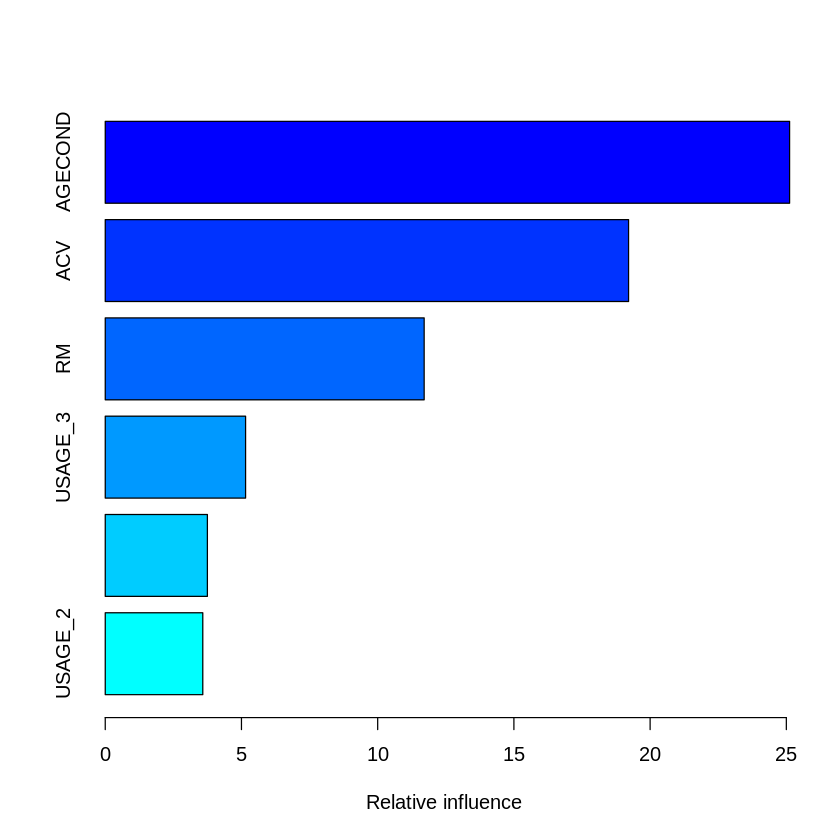

In [ ]:
#summary(fit,n.trees=1, 10)         # based on the first tree
summary(fit,n.trees=best.iter, 6) # based on the estimated best number of trees

In [ ]:
# least squares error
print(sum((test_auto$CHARGE - f.predict)^2))

msle(f.predict, test_auto$CHARGE)

[1] 3723379052


[1] 25.01251

In [ ]:
install.packages("mltools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



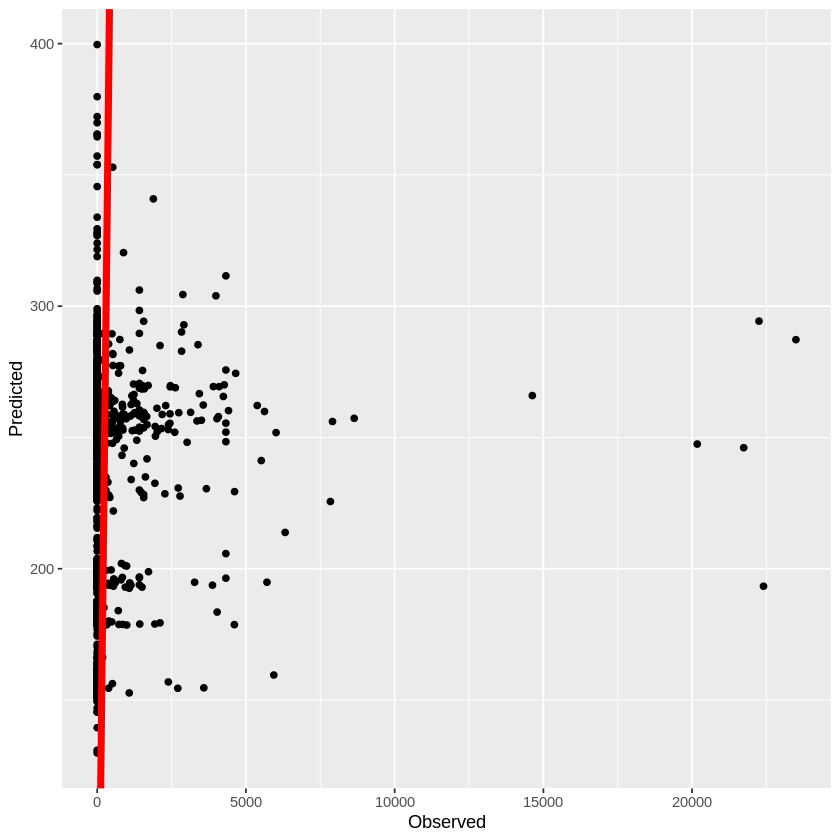

In [ ]:
# Create data for ggplot2
data_mod <- data.frame(Predicted = f.predict, Observed = test_auto$CHARGE)

# Draw plot using ggplot2 package
ggplot(data_mod,
       aes(x = Observed,
           y = Predicted)) +
  geom_point() +
  geom_abline(intercept = 0,
              slope = 1,
              color = "red",
              size = 2)

In [ ]:
data_mod$exposure = rep(1.0, length(data_mod$Predicted))
data_mod$obs <- 1:(dim(data_mod)[1])

In [ ]:
#
# Calculate bins of equal exposure based on sorting
# by model A predictions
#
nbBins = 10
set.seed(13472)
ord <- order(data_mod$Predicted, runif(length(data_mod$Predicted)))
data_mod <- data_mod[ord,]
cum.expo <- cumsum(data_mod$exposure)
total.exposure <- sum(data_mod$exposure)
bks <- c(0, 1:(nbBins-1) * total.exposure/nbBins, nbBins+0.2 * total.exposure/nbBins)
data_mod$bin.A <- cut(cum.expo, breaks = bks, labels = 1:nbBins)
data_mod <- data_mod[order(data_mod$Observed),]
data_mod <- data_mod[order(data_mod$obs),]

#rm(ord, cum.expo, total.exposure, bks)
# Check that summing exposure by bin number gives about
# equal exposure in each bin
tapply(data_mod$exposure, data_mod$bin.A, sum)

1   2   3   4   5   6   7   8   9  10 
 52 158 210 210 210 210 210 210 210 210

In [ ]:
avg.Predicted <- tapply(data_mod$Predicted, data_mod$bin.A, mean)/mean(data_mod$Predicted)
avg.actual <- tapply(data_mod$Observed, data_mod$bin.A, mean)/mean(data_mod$Predicted)

In [ ]:
avg.Predicted

1         2         3         4         5         6         7         8 
0.7110735 0.7223008 0.7239955 0.7396999 0.8486083 0.9153557 1.0818883 1.1805407 
        9        10 
1.2066302 1.2357180

In [ ]:
list(avg.actual)

[[1]]
         1          2          3          4          5          6          7 
0.09725086 0.00000000 0.07266111 0.28175916 0.45931055 1.32358354 1.82537804 
         8          9         10 
1.63460326 1.89701855 1.28106641

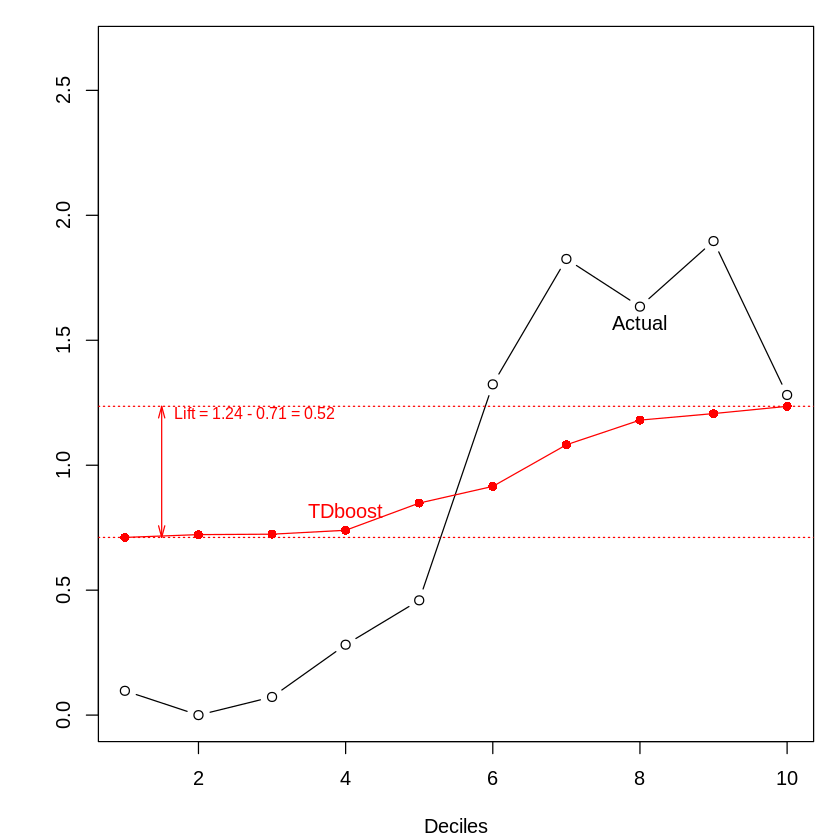

In [ ]:
#
# Now let's calculate the lift that the new model provides
# compared to the current base model using deciles
#

avg.Predicted <- tapply(data_mod$Predicted, data_mod$bin.A, mean)/mean(data_mod$Predicted)
avg.actual <- tapply(data_mod$Observed, data_mod$bin.A, mean)/mean(data_mod$Predicted)

par(mar = c(4,4,1,1)+0.1)
lim = c(0.0, 2.65)
plot(x = 1:nbBins, y = avg.actual, type = "b", ylim = lim,
xlab = "Deciles", ylab = "")
points(x = 1:nbBins, y = avg.Predicted, pch = 16, col = "red")
lines(x = 1:nbBins, y = avg.Predicted, col = "red")
text(x = 8, y = avg.actual[8], labels = "Actual", pos = 1)
text(x = 4, y = avg.Predicted[4], labels = "TDboost", pos = 3, col = "red")
abline(h = avg.Predicted[c(1,nbBins)], lty = 3, col = "red")
arrows(x0 = 1.5, y0 = avg.Predicted[1], x1 = 1.5, y1 = avg.Predicted[nbBins],
code = 3, col = "red", angle = 15, length = 0.1)
text(x = 1.5, y = 1.2,
labels = paste(c("Lift = ",
round(avg.Predicted[nbBins],2), " - ",
round(avg.Predicted[1],2), " = ",
round(diff(avg.Predicted[c(1,nbBins)]),2)),
collapse = ""),
pos = 4, cex = 0.8, col = "red")
rm(avg.Predicted, avg.actual, lim)

In [ ]:
gini <- function (x, weights = rep(1, length = length(x)))
{
  ox <- order(x)
  x <- x[ox]
  weights <- weights[ox]/sum(weights)
  p <- cumsum(weights)
  nu <- cumsum(weights * x)
  n <- length(nu)
  nu <- nu/nu[n]
  sum(nu[-1] * p[-n]) - sum(nu[-n] * p[-1])
}

In [ ]:
msle(f.predict, test_auto$CHARGE)

[1] 25.01251

In [ ]:
gini(f.predict)

[1] 0.02451402

In [ ]:
gini(test_auto$CHARGE)

[1] 0.9485972